In [1]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# import library
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# read dataset
df = pd.read_excel('./drive/MyDrive/2023Spring/Dataset/final/nueces.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 276 non-null    object 
 1   Drought Level Index  276 non-null    float64
 2   Precipitation_in     276 non-null    float64
 3   Temperature_C        277 non-null    float64
 4   Vegetation           277 non-null    float64
 5   Evapotranspiration   263 non-null    float64
dtypes: float64(5), object(1)
memory usage: 13.1+ KB


In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 262
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 263 non-null    object 
 1   Drought Level Index  263 non-null    float64
 2   Precipitation_in     263 non-null    float64
 3   Temperature_C        263 non-null    float64
 4   Vegetation           263 non-null    float64
 5   Evapotranspiration   263 non-null    float64
dtypes: float64(5), object(1)
memory usage: 14.4+ KB


Drought Level Index  Precipitation_in  Temperature_C  \
Drought Level Index             1.000000         -0.178565       0.211307   
Precipitation_in               -0.178565          1.000000      -0.043262   
Temperature_C                   0.211307         -0.043262       1.000000   
Vegetation                     -0.272931          0.270435       0.210189   
Evapotranspiration             -0.278781          0.350485       0.159841   

                     Vegetation  Evapotranspiration  
Drought Level Index   -0.272931           -0.278781  
Precipitation_in       0.270435            0.350485  
Temperature_C          0.210189            0.159841  
Vegetation             1.000000            0.640958  
Evapotranspiration     0.640958            1.000000

<ipython-input-5-b04f18f2feea>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask =  np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

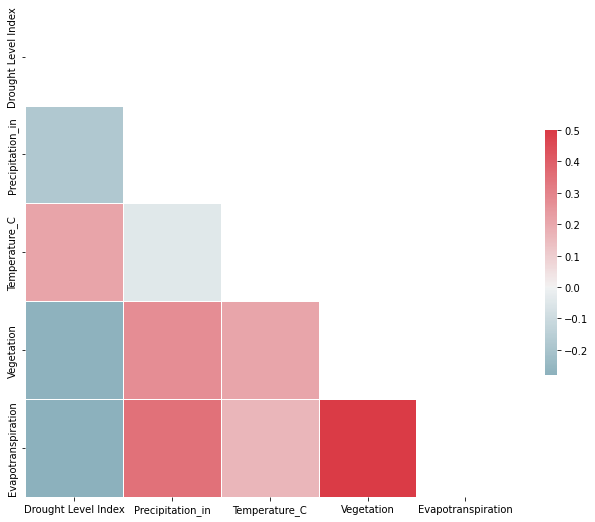

In [5]:
# compute correlations and plot correlation matrix
corr = df.corr(method='kendall')
display(corr)

# generate a mask for the upper triangle
mask =  np.triu(np.ones_like(corr, dtype=np.bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5, center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.5})

In [57]:
# training set and test set
Y = df['Drought Level Index']
X = df.iloc[:,2:6]
scale = StandardScaler()
scaledX = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

In [58]:
# sklearn linear regression
# perform regression using all variables
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
print('R squared:', metrics.r2_score(y_train, pred_train))
print('MAE:', metrics.mean_absolute_error(y_train, pred_train))
print('MSE:', metrics.mean_squared_error(y_train, pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))

R squared: 0.26030556056575826
MAE: 1.0810679508906074
MSE: 1.8352821807155437
RMSE: 1.354725869213231


In [59]:
pred = model.predict(X_test) 
print('R squared:', metrics.r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R squared: 0.40689844282617993
MAE: 1.0057040301248235
MSE: 1.4324554181421694
RMSE: 1.1968522958753804


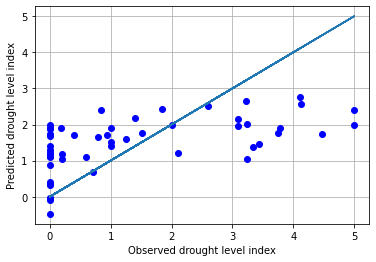

In [ ]:
fig = plt.figure(figsize=(6,4))
plt.plot(y_test, pred, 'bo')
plt.plot(y_test, y_test + 0, linestyle='solid')
plt.xlabel('Observed drought level index')
plt.ylabel('Predicted drought level index')
plt.grid()
plt.show()